In [98]:
import pandas as pd
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

data = pd.read_csv('./data/modify_other_train.csv')
data.head(0)

,Unnamed: 0,name,address,race,marital-status,occupation,pregnant,education-num,relationship,capital-gain,...,capital-loss,workclass,mean_glucose,std_glucose,kurtosis_glucose,skewness_glucose,mean_oxygen,std_oxygen,kurtosis_oxygen,skewness_oxygen


Hypoteza c.1
Pacient s diabetes mellitus maju v priemere vyssiu hodnotu spicatosti glukozy v krvi ako pacienti, ktory nemaju tuto chorobu. 

### Predpoklad normalnosti rozdelenia

In [99]:
positive = data.loc[data['class'] == 1, 'mean_glucose']
positive.describe()

count    1010.000000
mean       56.758485
std        30.339143
min         0.000000
25%        31.716797
50%        53.988281
75%        80.623047
max       139.257812
Name: mean_glucose, dtype: float64

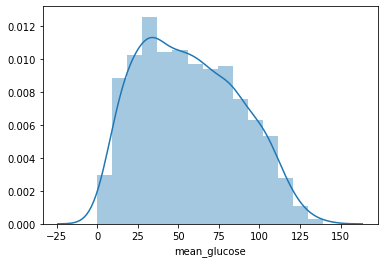

In [100]:
sns.distplot(positive)

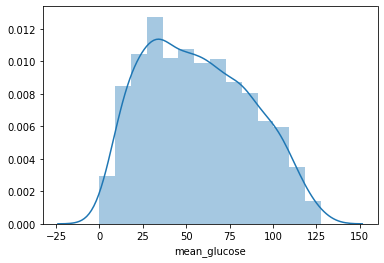

In [101]:
# Odstranenie outlierov 
def identify_outliers(a):
    lower = a.quantile(0.25) - 1 * stats.iqr(a)
    upper = a.quantile(0.75) + 1 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

positive_out = identify_outliers(positive)
positive = positive.drop(positive_out.index)

sns.distplot(positive)

In [102]:
negative = data.loc[data['class'] == 0, 'mean_glucose']
negative.describe()

count    2956.000000
mean      115.943145
std        18.967368
min         0.000000
25%       105.585938
50%       117.453125
75%       127.642578
max       189.734375
Name: mean_glucose, dtype: float64

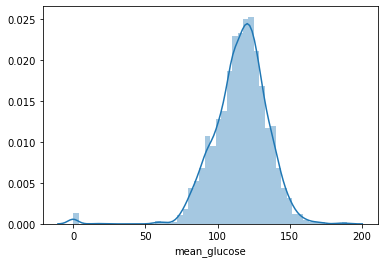

In [103]:
sns.distplot(negative)

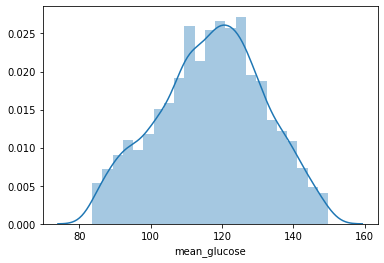

In [104]:
negative_out = identify_outliers(negative)
negative = negative.drop(negative_out.index)

sns.distplot(negative)

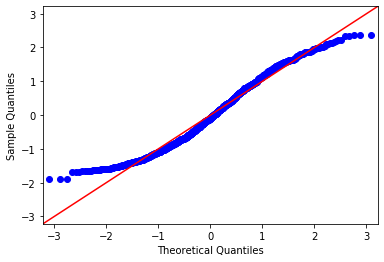

In [105]:
_ = sm.ProbPlot(positive, fit=True).qqplot(line='45')

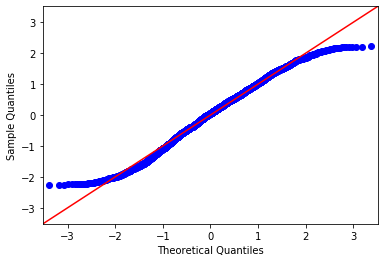

In [106]:
_ = sm.ProbPlot(negative, fit=True).qqplot(line='45')

### Normal Q-Q plot
#### Light tailed
Obe skupiny pozorovania pochadzaju z rovnakeho rozdelenia, teda z normaloveho,
taktiez pozorovane vzorky pochadzaju z testovaneho teoretickeho rozdelenia,
pricom obe rozdelenia maju podobne (skoro totozne) vlastnosti asymetrie a spicatosti 


In [107]:
stats.shapiro(positive)

(0.970532238483429, 2.0116638118749391e-13)

In [108]:
stats.shapiro(negative)

(0.9893515706062317, 1.381623629522974e-13)

Pomocou Shapiro-Wilkovho testu normalnosti sme zistili, ze hodnota je vacsia ako 0.05, 
tym padom nulovu hypotezu nezamietame a mozme prehlasit, ze data pochadzaju z normaloveho rozdelenia

#### Podobnost variancie

In [109]:
stats.levene(positive, negative)

LeveneResult(statistic=1069.7456056676306, pvalue=6.288375077258898e-207)

Vzorky nepochadzaju z rozdeleni s rovnakou varianciou

In [110]:
stats.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [111]:
stats.mannwhitneyu(positive, negative)

MannwhitneyuResult(statistic=110038.0, pvalue=0.0)

Kedze pravdepodobnost chyby prveho radu 0.0 < 0.001 je mensia ako 1 promile, mozeme prehlasit nasu
hypoteza za platnu.

In [117]:
sms.DescrStatsW(positive).tconfint_mean()

(54.66114859914073, 58.37987672360008)

In [118]:
sms.DescrStatsW(negative).tconfint_mean()

(116.4141126587196, 117.50847358680011)

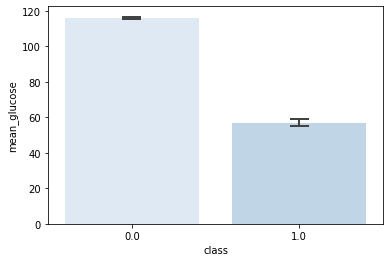

In [114]:
sns.barplot(x='class',y='mean_glucose',data=data,capsize=0.1,errwidth=2,palette=sns.color_palette("Blues"))
